In [1]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cross_validation import KFold
#import keras
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

In [2]:
def plotFeatures(X, headers):
    for i in range(X.shape[1]):
        data = [X[y==j,i] for j in range(10)]
        plt.figure()
        plt.boxplot(data)
        
        plt.ylabel(headers[i+4]) # faltan headers
        
         
        plt.show()

# Preprocesamiento de la Data

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Se leen los datos del archivo csv
data = pd.read_csv("MovieGenre.csv", encoding ="ISO-8859-1",na_values=" NaN")
data.fillna('', inplace=True)
data.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [5]:
genre={}
genre_dict=[]
for x in data.index:
    genre[x]=data['Genre'][x]
    row = genre[x].split("|")
    for y in row:
        if y not in genre_dict and y != "":
            genre_dict.append(y)
            
genre_dict = sorted(genre_dict)
genre_dict

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [6]:
from pandas import DataFrame

movie_dict=[]
frame = np.zeros((len(data),len(genre_dict)))
for x in range(len(data)):
    for y in range(len(genre_dict)):
        if genre_dict[y] in data['Genre'][x]:
            frame[x, y] = 1
df = DataFrame(frame, index=data.index, columns=genre_dict)
df.astype(int)
df.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
genres = df
corrmat = genres.corr()
corrmat.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Action,1.000000,-0.007316,0.250191,0.060543,-0.058959,-0.094237,0.157292,-0.120467,-0.122557,-0.060378,...,-0.017829,-0.002765,-0.124800,0.127784,-0.040039,-0.020076,-0.005173,0.061429,-0.011294,-0.019027
Adult,-0.007316,1.000000,-0.006071,0.002543,0.001854,-0.006966,-0.007268,-0.001603,-0.008008,-0.004392,...,-0.000851,-0.000132,-0.004322,-0.004303,0.005210,-0.002503,-0.000247,-0.006903,-0.003243,-0.002755
Adventure,0.250191,-0.006071,1.000000,0.218861,-0.032688,-0.031515,-0.072108,-0.082244,-0.146343,0.149130,...,-0.011060,-0.002294,-0.089090,0.042737,-0.025725,-0.032557,-0.004292,-0.076942,-0.029701,0.006802
Animation,0.060543,0.002543,0.218861,1.000000,-0.038824,0.022746,-0.066817,-0.060014,-0.161833,0.202944,...,-0.007041,-0.001508,-0.084802,-0.001751,0.258370,-0.028612,-0.002822,-0.075900,-0.034901,-0.029794
Biography,-0.058959,0.001854,-0.032688,-0.038824,1.000000,-0.116318,-0.023285,0.162177,0.065661,-0.031203,...,0.014782,-0.001617,-0.057972,-0.050125,-0.027160,0.089471,-0.003026,-0.079318,-0.010514,-0.023438


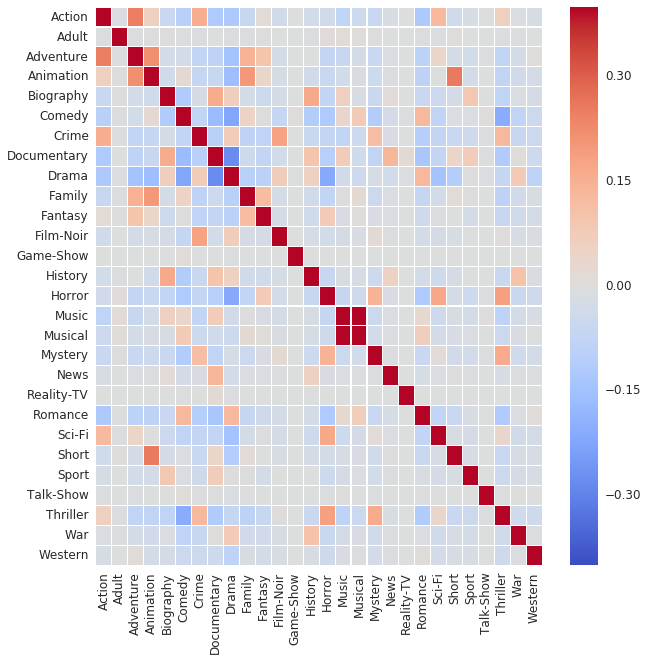

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# set appropriate font and dpi
sns.set(font_scale=1.2)
# plot heatmap
plt.figure(figsize = (10,10))
ax = sns.heatmap(corrmat,linewidths=.1, vmin=-0.4, vmax=0.4, cmap="coolwarm")

plt.show()

In [9]:
# generate new Y variable -- number of genres
genres['num_genres'] = genres.ix[:, 1:19].sum(axis=1)
genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,num_genres
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [10]:
genres.shape

(40108, 29)

In [11]:
poster_df = data['Poster']
poster_df.shape

(40108,)

In [12]:
newposter_df = []
for i in range(poster_df.shape[0]):
    if(poster_df[i]!=''):
        newposter_df.append(poster_df[i])
len(newposter_df)

39383

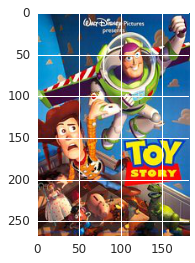

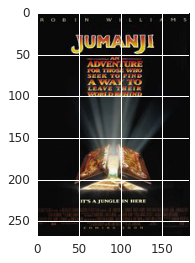

In [13]:
import cv2
from io import BytesIO
import urllib
from urllib.request import urlopen

X_data = []
count=0
for i in range(0,2):
    file = urlopen(newposter_df[i])
    img = plt.imread(file, format='jpg')
    X_data.append(img)

for i in range(len(X_data)):
    plt.imshow(X_data[i])
    plt.show() 
   

In [14]:
from scipy import misc
labels=['imdbId']
color=['r','g','b']
for c in color:
    for i in range(500*750): ## resolution maxium is 500*750
        label=c+str(i)
        labels.append(label)

In [15]:

target = open("poster_matrix.txt", 'w')
for label in labels:
    if label!=labels[-1]:
        target.write(label+"\t")
    else:
        target.write(label+"\n")
target.flush()

In [ ]:
n_group=100 # 250 poster as a file
total_groups=poster_df.shape[0]/n_group+1 ## total group number
directory="G:/data/clean_data/poster/"
n_color=3
width=500
height=750
for i in range(total_groups):
    matrix=np.zeros((n_group,width*height*n_color+1),dtype=int)
    for j in range(n_group):
        tmdb_id=poster_df.iloc[i*500+250+j,0]        
        filename=directory+str(tmdb_id)+".jpg"        
        try: 
            arr = misc.imread(filename)
        except IOError:
            continue
        matrix[j,0]=tmdb_id 
        ## check if oversize and set maximum height as 750
        trans_height=min(height,arr.shape[0])
        ## check if image is colorful
        if len(arr.shape)==3:
            for c in range(n_color):
                for h in range(trans_height):
                    ind_start=c*height*width+1+h*width
                    ind_end=ind_start+width
                    matrix[j,ind_start:ind_end]=arr[h,:,c]
        else:
            for c in range(n_color):
                for h in range(trans_height):
                    ind_start=c*height*width+1+h*width
                    ind_end=ind_start+width
                    matrix[j,ind_start:ind_end]=arr[h,:]
    target_name="G:/data/clean_data/poster_matrices/poster_matrix_"+str(i)+".csv"
    with open(target_name, 'wb') as f:
        np.savetxt(f,matrix,fmt='%d',delimiter=",")
    print i

# WebScraping


In [6]:
# Se obtienen los resumenes de las peliculas
import requests
from bs4 import BeautifulSoup
import csv

def get_synopsis(link):
    base_link = "http://www.imdb.com"
    page = requests.get(base_link + link)
    soup = BeautifulSoup(page.content, 'html.parser')
    text = soup.find(id="plot-synopsis-content").get_text()
    return text

def get_text_data(movie_links, filename):    
    with open(filename, "w") as csvfile:        
        field_names = ["Imdb Link", "Synopsis Link", "Synopsis"]
        writer = csv.DictWriter(csvfile, fieldnames=field_names)
        writer.writeheader()

        for link in movie_links:
            csv_fields = {}
            csv_fields['Imdb Link'] = link
            page = requests.get(link)
            soup = BeautifulSoup(page.content, 'html.parser')
            storyline_block = soup.find(id="titleStoryLine")
            if storyline_block is None:
                print(link)
                continue          
                
            see_more_block = storyline_block.find("span",{'class':"see-more inline"})        
            sm_link_blocks = see_more_block.find_all("a")
            for sm_link_block in sm_link_blocks:
                if sm_link_block.get_text() == "Plot Synopsis":
                    sm_link = sm_link_block['href']
                    csv_fields['Synopsis Link'] = sm_link
                    csv_fields['Synopsis'] = get_synopsis(sm_link)
                    break

            writer.writerow(csv_fields)
            
def divide_list(n_chunks, list_to_divide):
    # TODO
    # Move to utils file
    chunk_size = len(list_to_divide)//n_chunks + 1
    chunks = [list_to_divide[i:i+chunk_size] for i in range(0, len(list_to_divide), chunk_size)]
    
    return chunks
    
import multiprocessing
n_jobs = 2
chunks = divide_list(n_jobs, data['Imdb Link'])


jobs = []
for i, chunk in enumerate(chunks):    
    filename = "Movie_Synopsis_" + str(i) + ".csv"
    p = multiprocessing.Process(target=get_text_data,
                                args=(chunk, filename))
    jobs.append(p)
    p.start()
    
for job in jobs:
    job.join()

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/renzo/anaconda3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py", line 379, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/renzo/anaconda3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py", line 379, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

  File "/home/renzo/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/renzo/anaconda3/lib/python3.5/multipro

KeyboardInterrupt: 